In [1]:
import pandas as pd
import numpy as np


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
df = pd.read_csv('data.csv')

In [4]:
df.head()

,private,apps,accept,enroll,top10perc,top25perc,f_undergrad,p_undergrad,outstate,room_board,books,personal,phd,terminal,s_f_ratio,perc_alumni,expend,grad_rate
0,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


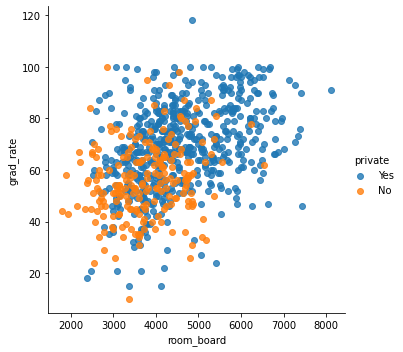

In [5]:
sns.lmplot(x='room_board',y='grad_rate',data=df,hue='private',fit_reg=False)

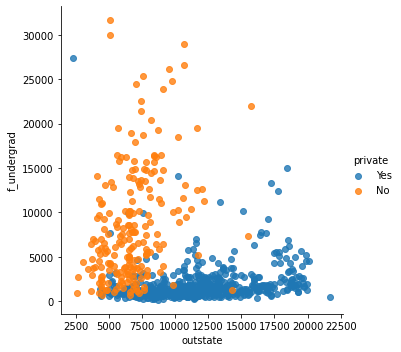

In [6]:
sns.lmplot(x='outstate',y='f_undergrad',data=df,hue='private',fit_reg=False)


c:\Users\acer\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


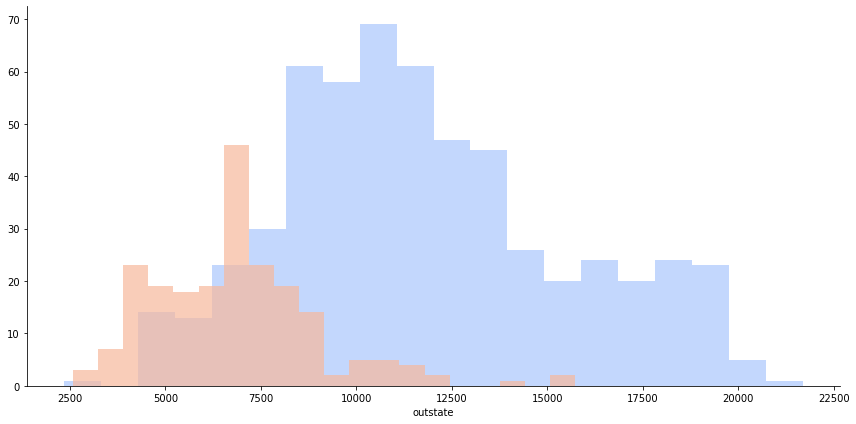

In [7]:
g = sns.FacetGrid(df,hue='private',palette='coolwarm',size=6,aspect=2)
g =g.map(plt.hist,'outstate',bins=20,alpha=0.7)

In [8]:
df[df['grad_rate']>100]

,private,apps,accept,enroll,top10perc,top25perc,f_undergrad,p_undergrad,outstate,room_board,books,personal,phd,terminal,s_f_ratio,perc_alumni,expend,grad_rate
95,Yes,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,118


In [18]:
df[df['grad_rate']]['95']==100

KeyError: "None of [Int64Index([60, 56, 54, 59, 15, 55, 63, 73, 80, 52,\n            ...\n            59, 50, 78, 75, 82, 40, 83, 49, 99, 99],\n           dtype='int64', length=777)] are in the [columns]"

In [19]:
from sklearn.cluster import KMeans

In [20]:
kmeans = KMeans(n_clusters=4)

In [21]:
kmeans.fit(df.drop('private',axis=1))

KMeans(n_clusters=4)

In [22]:
kmeans.cluster_centers_

array([[1.67567094e+03, 1.20365171e+03, 5.00224359e+02, 2.03482906e+01,
        4.80299145e+01, 2.30697863e+03, 7.04690171e+02, 8.45888889e+03,
        3.96226068e+03, 5.31908120e+02, 1.36355983e+03, 6.56025641e+01,
        7.31324786e+01, 1.50279915e+01, 1.95961538e+01, 7.31216239e+03,
        6.08311966e+01, 7.13675214e-01],
       [9.34175000e+03, 3.60625000e+03, 1.32195000e+03, 7.60500000e+01,
        9.17000000e+01, 5.28320000e+03, 4.27200000e+02, 1.81197500e+04,
        6.04275000e+03, 5.76600000e+02, 1.25555000e+03, 9.33000000e+01,
        9.68000000e+01, 6.61500000e+00, 3.53500000e+01, 3.23479000e+04,
        8.89500000e+01, 1.00000000e+00],
       [2.32830097e+03, 1.58846602e+03, 4.92830097e+02, 3.74417476e+01,
        6.68640777e+01, 1.96334951e+03, 3.04563107e+02, 1.50857718e+04,
        5.18160194e+03, 5.68315534e+02, 1.07616505e+03, 8.20582524e+01,
        8.90000000e+01, 1.17500000e+01, 3.14660194e+01, 1.28801165e+04,
        7.57038835e+01, 9.90291262e-01],
       [1.062

In [23]:
def converter(private):
    if private == 'Yes':
        return 1
    else:
        return 0


In [24]:
df['Cluster'] = df['private'].apply(converter)

In [25]:
df['Cluster']

0      1
1      1
2      1
3      1
4      1
      ..
772    0
773    1
774    1
775    1
776    1
Name: Cluster, Length: 777, dtype: int64

In [26]:
from sklearn.metrics import confusion_matrix,classification_report

In [27]:
print(confusion_matrix(df['Cluster'],kmeans.labels_))
print(classification_report(df['Cluster'],kmeans.labels_))

[[134   0   2  76]
 [334  20 204   7]
 [  0   0   0   0]
 [  0   0   0   0]]
              precision    recall  f1-score   support

           0       0.29      0.63      0.39       212
           1       1.00      0.04      0.07       565
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0

    accuracy                           0.20       777
   macro avg       0.32      0.17      0.12       777
weighted avg       0.81      0.20      0.16       777



c:\Users\acer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\acer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\acer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r